# Examples of using adding_problem_model_evaluation

This jupyter notebook shows how to use the adding_problem_model_evaluation package.

In [1]:
import adding_problem_model_evaluation as adp

In [2]:
from matplotlib import pyplot as plt
def visualize_evaluation(res):
    cols = 2
    if len(res) < 3:
        rows = 1
        cols = len(res)
    elif len(res)%2 > 0:
        rows = int((len(res)+1)/2)
    else:
        rows = int(len(res)/2)   
    fig, axs = plt.subplots(rows, cols, figsize=(5*rows, 5*cols))
    
    seq_lens = list(res.keys())
    for i in range(len(res)):
        _, history = res[seq_lens[i]]
        if rows == 1:
            axs[i].plot(history.epoch[1:], history.history['mse'][1:])
            axs[i].plot(history.epoch[1:], history.history['val_mse'][1:])
            axs[i].set_title(f"model evaluation plot for sequence length {seq_lens[i]}")
            axs[i].set_ylabel('mean squared error')
            axs[i].set_xlabel('epoch')
            axs[i].legend(['train', 'validation'], loc='upper right')
        else:
            r = int(i/rows)
            c = i % cols
            axs[r, c].plot(history.epoch[1:], history.history['mse'][1:])
            axs[r, c].plot(history.epoch[1:], history.history['val_mse'][1:])
            axs[r, c].set_title(f"model evaluation plot for sequence length {seq_lens[i]}")
            axs[r, c].set_ylabel('mean squared error')
            axs[r, c].set_xlabel('epoch')
            axs[r, c].legend(['train', 'validation'], loc='upper right')

## Creating Adding_Problem_ModelEvaluator

In [5]:
ap_model_evaluator = adp.Adding_Problem_ModelEvaluator(sequence_lengths = [5, 10, 15, 20 ], 
                                                   train_len=1000, test_len=200, valid_len=100)

A model evaluator is created to evaluate models for sequence length in [5, 10, 15, 20 ]

## Evaluating the models with default parameters

In [12]:
results = ap_model_evaluator.run_evaluation_for_sequence_len(epochs=100, verbose=0, save=False)

running model fit for sequence length 5 for learning rate 0.01...
7/7 [==============================] - 0s 3ms/step - loss: 0.0074 - mse: 0.0148
running model fit for sequence length 10 for learning rate 0.01...
7/7 [==============================] - 0s 3ms/step - loss: 0.0087 - mse: 0.0175
running model fit for sequence length 15 for learning rate 0.01...
7/7 [==============================] - 0s 5ms/step - loss: 0.0150 - mse: 0.0301
running model fit for sequence length 20 for learning rate 0.01...
7/7 [==============================] - 0s 4ms/step - loss: 0.0384 - mse: 0.0767


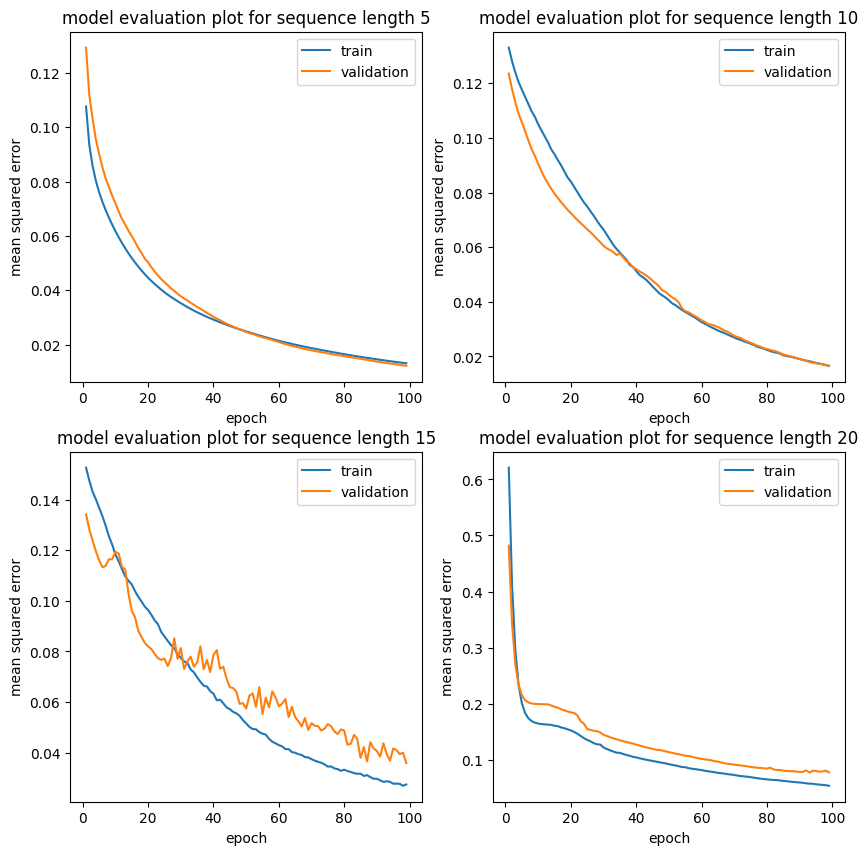

In [27]:
visualize_evaluation(results)

## Evaluating the models with selected learning rate chosen using learning rate scheduler

### Training the models with  learning rate scheduler

In [30]:
lr_results = ap_model_evaluator.run_evaluation_for_learning_rate(verbose=0)

evaluation_for_learning_rate: running fit for sequence length 5 ...
evaluation_for_learning_rate: running fit for sequence length 10 ...
evaluation_for_learning_rate: running fit for sequence length 15 ...
evaluation_for_learning_rate: running fit for sequence length 20 ...


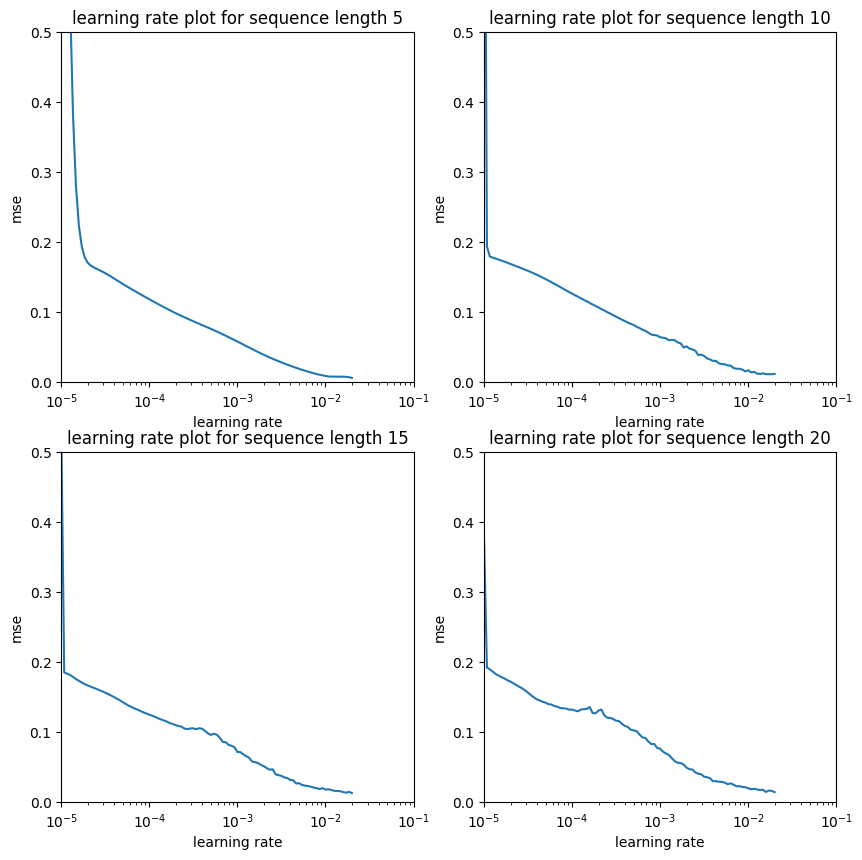

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
subplots = {5:axs[0,0], 10:axs[0,1], 15:axs[1,0], 20:axs[1,1]}
for seq_len in [5, 10, 15, 20]:
    history = lr_results[seq_len]
    subplots[seq_len].semilogx(history.history["lr"], history.history["mse"])
    subplots[seq_len].axis([1e-5, 1e-1, 0, 0.5])
    subplots[seq_len].title.set_text(f"learning rate plot for sequence length {seq_len}")
    subplots[seq_len].set_ylabel('mse')
    subplots[seq_len].set_xlabel('learning rate')
plt.show()

### Retraining the models with the selected learning rate of 1.5e-2

In [41]:
selected_results = ap_model_evaluator.run_evaluation_for_sequence_len(epochs=100, lrs={5:1.5e-2, 10:1.5e-2, 15:1.5e-2, 20:1.5e-2}, verbose=0, save=False)

running model fit for sequence length 5 for learning rate 0.015...
7/7 [==============================] - 0s 5ms/step - loss: 0.0040 - mse: 0.0080
running model fit for sequence length 10 for learning rate 0.015...
7/7 [==============================] - 0s 3ms/step - loss: 0.0049 - mse: 0.0098
running model fit for sequence length 15 for learning rate 0.015...
7/7 [==============================] - 0s 8ms/step - loss: 0.0104 - mse: 0.0208
running model fit for sequence length 20 for learning rate 0.015...
7/7 [==============================] - 0s 3ms/step - loss: 0.0333 - mse: 0.0665


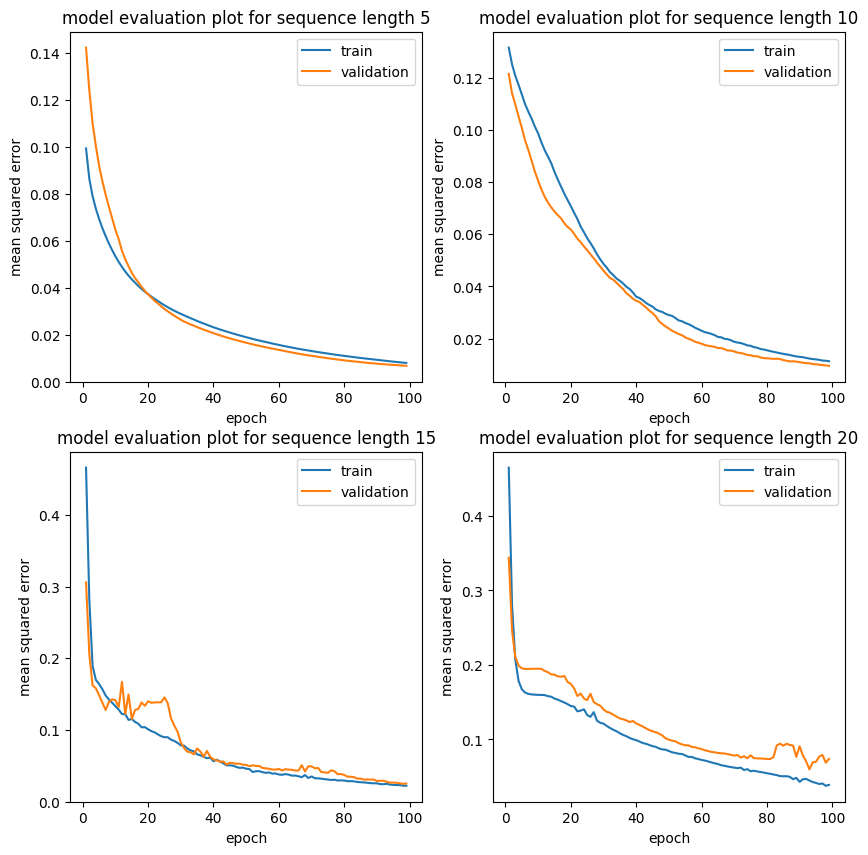

In [42]:
visualize_evaluation(selected_results)

## Hypeparameter tuning for model with sequence length 20

In [3]:
ap_model_evaluator = adp.Adding_Problem_ModelEvaluator(sequence_lengths=[20], train_len=1000, test_len=200, valid_len=100)
tuning_results = ap_model_evaluator.run_parameter_tuning(epochs=20, verbose=2)

running the hyper parameter tuning for sequence length 20...
|   iter    |  target   | clipnorm  | learni... | momentum  |
-------------------------------------------------------------
| 1         | -0.09978  | 37.45     | 0.009512  | 0.7247    |
| 2         | -0.1381   | 59.87     | 0.001645  | 0.1544    |
| 3         | -0.09056  | 5.808     | 0.008675  | 0.5951    |
| 4         | -0.1451   | 70.81     | 0.0003038 | 0.9602    |
| 5         | -0.135    | 83.24     | 0.002202  | 0.18      |
| 6         | -0.1553   | 20.16     | 0.0001    | 0.0       |
| 7         | -0.0592   | 4.84      | 0.003112  | 0.9008    |
| 8         | -0.1151   | 3.938     | 0.00809   | 0.2127    |
| 9         | -0.1099   | 4.999     | 0.007591  | 0.2825    |
| 10        | -0.05609  | 5.175     | 0.0008256 | 0.9651    |
| 11        | -0.06794  | 7.27      | 0.009462  | 0.9271    |
| 12        | -0.07213  | 8.433     | 0.001956  | 0.99      |
| 13        | -0.1598   | 7.893     | 0.001101  | 0.002044  |
| 14     

In [5]:
results = ap_model_evaluator.run_tuned_evaluation_for_sequence_len(epochs=100, verbose=0,lrs={20:0.0008255802862335746}, 
                                                                   momentums={20:0.9650714823033266}, 
                                                                   clipnorms={20:5.175453731403234}, save=False)

running model fit for sequence length 20 for learning rate 0.0008255802862335746...
7/7 [==============================] - 0s 4ms/step - loss: 0.0033 - mse: 0.0067


***Before model tuning mse: 0.0665 - After model tuning mse: 0.0067***